### GPU simulaton of Blast Wave in Reflecting Box with AthenaK

### Spin-Up a GPU instance, compile, and execute the simulation code

In [1]:
# spin up camber
import camber

In [ ]:
# Remove previous CMakeChache.txt file if needed
job = camber.athena.create_job(
    "rm CMakeCache.txt",
    worker_size="XSMALL",
    with_gpu=True,
)

In [ ]:
# We first configure the build to run the Blast Wave problem
job = camber.athena.create_job(
    "cmake -DPROBLEM=blast -DKokkos_ENABLE_CUDA=On -DKokkos_ARCH_VOLTA70=On -DCMAKE_CXX_COMPILER=$ATHENA_HOME/kokkos/bin/nvcc_wrapper ../",
    worker_size="XSMALL",
    with_gpu=True,
)

In [ ]:
# Now compile the makefile
job = camber.athena.create_job(
    command="make all -j$(nproc)",
    worker_size="XSMALL",
    with_gpu=True,
)

In [13]:
# You can see a list of all active and recent jobs via the command
camber.athena.list_jobs()

[AthenaJob({"job_id": 1162, "status": "RUNNING", "worker_size": "XSMALL", "job_type": "ATHENA", "command": "src/athena -i blast_hydro.athinput", "file_dir": "athenak", "with_gpu": false, "tags": null}),
 AthenaJob({"job_id": 1152, "status": "COMPLETED", "worker_size": "XSMALL", "job_type": "ATHENA", "command": "src/athena -i blast_hydro.athinput", "file_dir": "athenak", "with_gpu": false, "tags": null}),
 AthenaJob({"job_id": 1151, "status": "COMPLETED", "worker_size": "XSMALL", "job_type": "ATHENA", "command": "src/athena -i blast_hydro.athinput", "file_dir": "athenak", "with_gpu": false, "tags": null}),
 AthenaJob({"job_id": 1150, "status": "COMPLETED", "worker_size": "XSMALL", "job_type": "ATHENA", "command": "make all -j$(nproc)", "file_dir": "athenak", "with_gpu": false, "tags": null}),
 AthenaJob({"job_id": 1149, "status": "COMPLETED", "worker_size": "XSMALL", "job_type": "ATHENA", "command": "cmake -DPROBLEM=blast -DKokkos_ENABLE_CUDA=On -DKokkos_ARCH_VOLTA70=On -DCMAKE_CXX_COMP

In [12]:
# after the jobs is launched, you can check the job progess via the read_logs command.  This information will also be
# output to a file that you can read from the command line.  For example, job 1 would be written to file job1.log

job = camber.athena.create_job(
    command="src/athena -i blast_hydro.athinput",
    worker_size="XSMALL",
    with_gpu=True,
)

### Plot the results and make a movie

In [27]:
subprocess.Popen(["python","plot_slice.py"]) # bin/Blast.hydro_w.00000.bin dens output_images/img00000.png -c sn_iceFire")

<Popen: returncode: None args: ['python', 'plot_slice.py']>

In [ ]:
# generate images and movie
import plot_output_slice
import subprocess
subprocess.run(["mkdir","output_images"]) # make image directory if needed
plot_output_slice.plot_output()

plotting bin/Blast.hydro_w.00000.bin...
plotting bin/Blast.hydro_w.00001.bin...
plotting bin/Blast.hydro_w.00002.bin...
plotting bin/Blast.hydro_w.00003.bin...
plotting bin/Blast.hydro_w.00004.bin...
plotting bin/Blast.hydro_w.00005.bin...
plotting bin/Blast.hydro_w.00006.bin...
plotting bin/Blast.hydro_w.00007.bin...
plotting bin/Blast.hydro_w.00008.bin...
plotting bin/Blast.hydro_w.00009.bin...
plotting bin/Blast.hydro_w.00010.bin...
plotting bin/Blast.hydro_w.00011.bin...
plotting bin/Blast.hydro_w.00012.bin...
plotting bin/Blast.hydro_w.00013.bin...
plotting bin/Blast.hydro_w.00014.bin...
plotting bin/Blast.hydro_w.00015.bin...
plotting bin/Blast.hydro_w.00016.bin...
plotting bin/Blast.hydro_w.00017.bin...
plotting bin/Blast.hydro_w.00018.bin...
plotting bin/Blast.hydro_w.00019.bin...
plotting bin/Blast.hydro_w.00020.bin...
plotting bin/Blast.hydro_w.00021.bin...
plotting bin/Blast.hydro_w.00022.bin...
plotting bin/Blast.hydro_w.00023.bin...
plotting bin/Blast.hydro_w.00024.bin...


plotting vtk/Blast.hydro_w.00000.vtk...
plotting vtk/Blast.hydro_w.00001.vtk...
plotting vtk/Blast.hydro_w.00002.vtk...
plotting vtk/Blast.hydro_w.00003.vtk...
plotting vtk/Blast.hydro_w.00004.vtk...
plotting vtk/Blast.hydro_w.00005.vtk...
plotting vtk/Blast.hydro_w.00006.vtk...
plotting vtk/Blast.hydro_w.00007.vtk...
plotting vtk/Blast.hydro_w.00008.vtk...
plotting vtk/Blast.hydro_w.00009.vtk...
plotting vtk/Blast.hydro_w.00010.vtk...
plotting vtk/Blast.hydro_w.00011.vtk...
plotting vtk/Blast.hydro_w.00012.vtk...
plotting vtk/Blast.hydro_w.00013.vtk...
plotting vtk/Blast.hydro_w.00014.vtk...
plotting vtk/Blast.hydro_w.00015.vtk...
plotting vtk/Blast.hydro_w.00016.vtk...
plotting vtk/Blast.hydro_w.00017.vtk...
plotting vtk/Blast.hydro_w.00018.vtk...
plotting vtk/Blast.hydro_w.00019.vtk...
plotting vtk/Blast.hydro_w.00020.vtk...
plotting vtk/Blast.hydro_w.00021.vtk...
plotting vtk/Blast.hydro_w.00022.vtk...
plotting vtk/Blast.hydro_w.00023.vtk...
plotting vtk/Blast.hydro_w.00024.vtk...


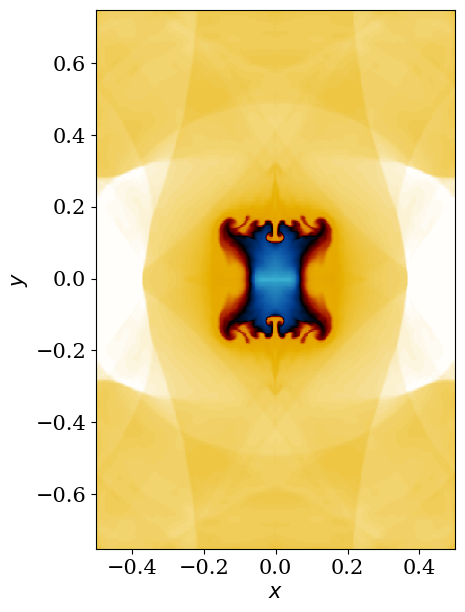

In [45]:
# generate images and movie
import plot_output
import subprocess
subprocess.run(["mkdir","output_images"]) # make image directory if needed
plot_output.plot_output()

### Visualize the Data

In [43]:
from IPython.display import Video
Video("density.mov")